In [77]:
from src.image_registration import *
from src.image_utils import *
from torch_snippets import *

In [139]:
# Parse PascalVOC xmls
import xml.etree.ElementTree as ET
def read_content(xml_file: str):

    tree = ET.parse(xml_file)
    root = tree.getroot()

    list_with_all_boxes = []
    box_names = []
    
    filepath = root.find('filename').text
    for boxes in root.iter('object'):

        box_name = boxes.find('name').text
        box_names.append(box_name)

        ymin, xmin, ymax, xmax = None, None, None, None

        ymin = int(boxes.find("bndbox/ymin").text)
        xmin = int(boxes.find("bndbox/xmin").text)
        ymax = int(boxes.find("bndbox/ymax").text)
        xmax = int(boxes.find("bndbox/xmax").text)

        list_with_single_boxes = [xmin, ymin, xmax, ymax]
        list_with_all_boxes.append(list_with_single_boxes)

    return filepath, box_names, list_with_all_boxes

impath, names, boxes = read_content("templates/w9_main.xml")

In [56]:
from pdf2image import convert_from_path

In [120]:
pdfpath = './templates/test_cases/test_case_1.pdf'
images = convert_from_path(pdfpath)
test_image = np.array(images[0])

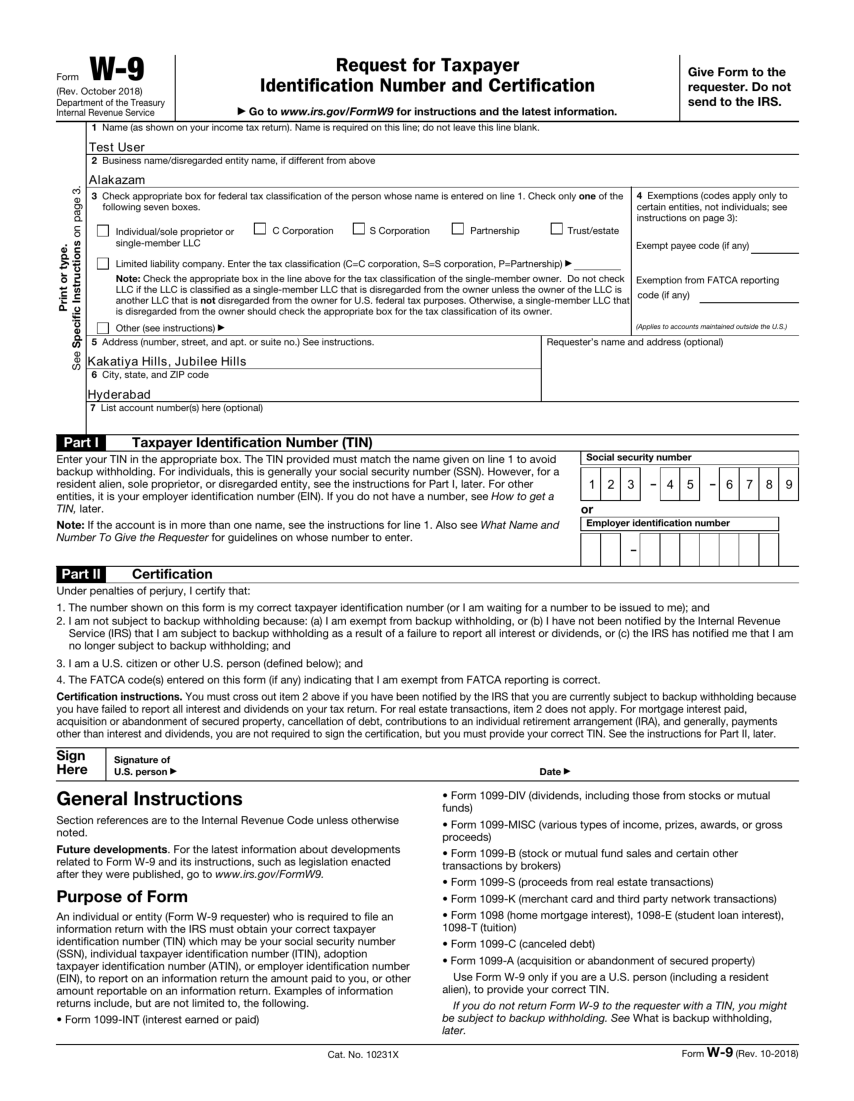

In [121]:
show(test_image)

## Register a rotated image

In [129]:
rotated_image = rotate_image(test_image, 10)

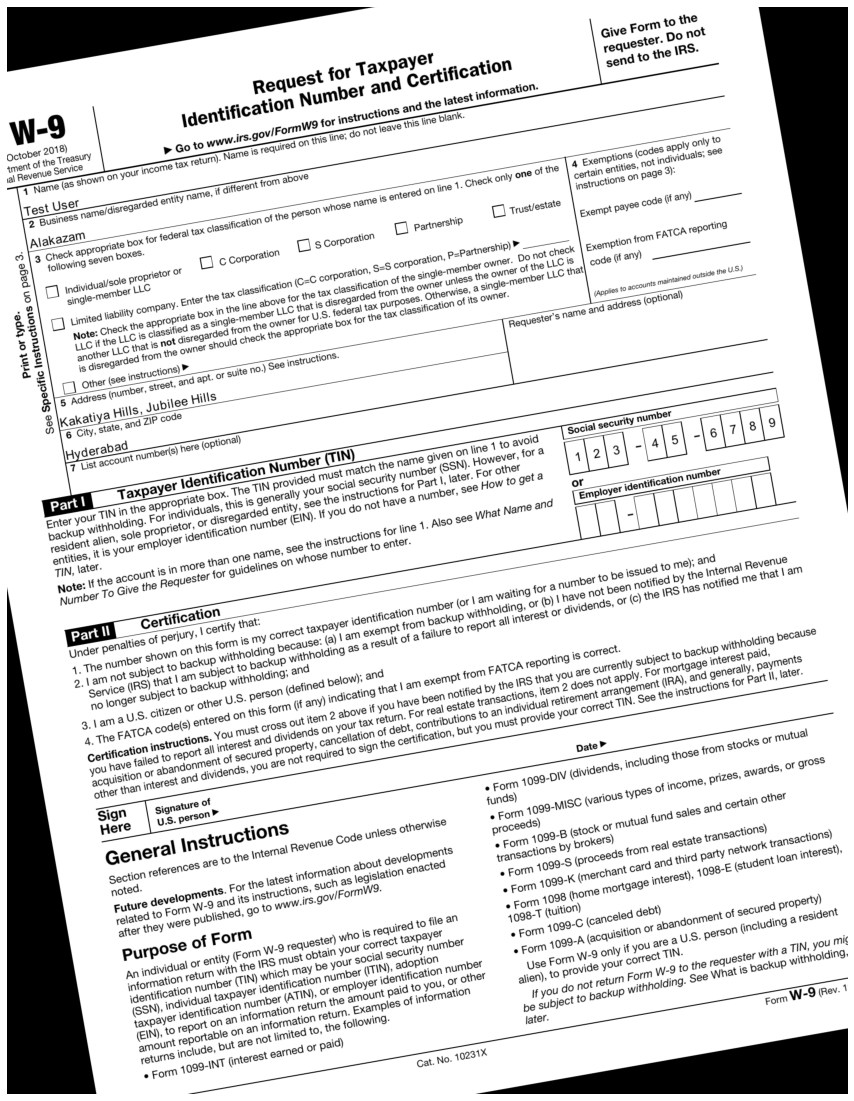

In [145]:
show(rotated_image)

In [146]:
from PIL import Image
im = Image.fromarray(rotated_image)
im.save('./templates/test_cases/rotated_img.jpg')

In [131]:
template_img = read('./templates/w9_main.jpg')

In [132]:
register_image = register_to_template(rotated_image, template_img)

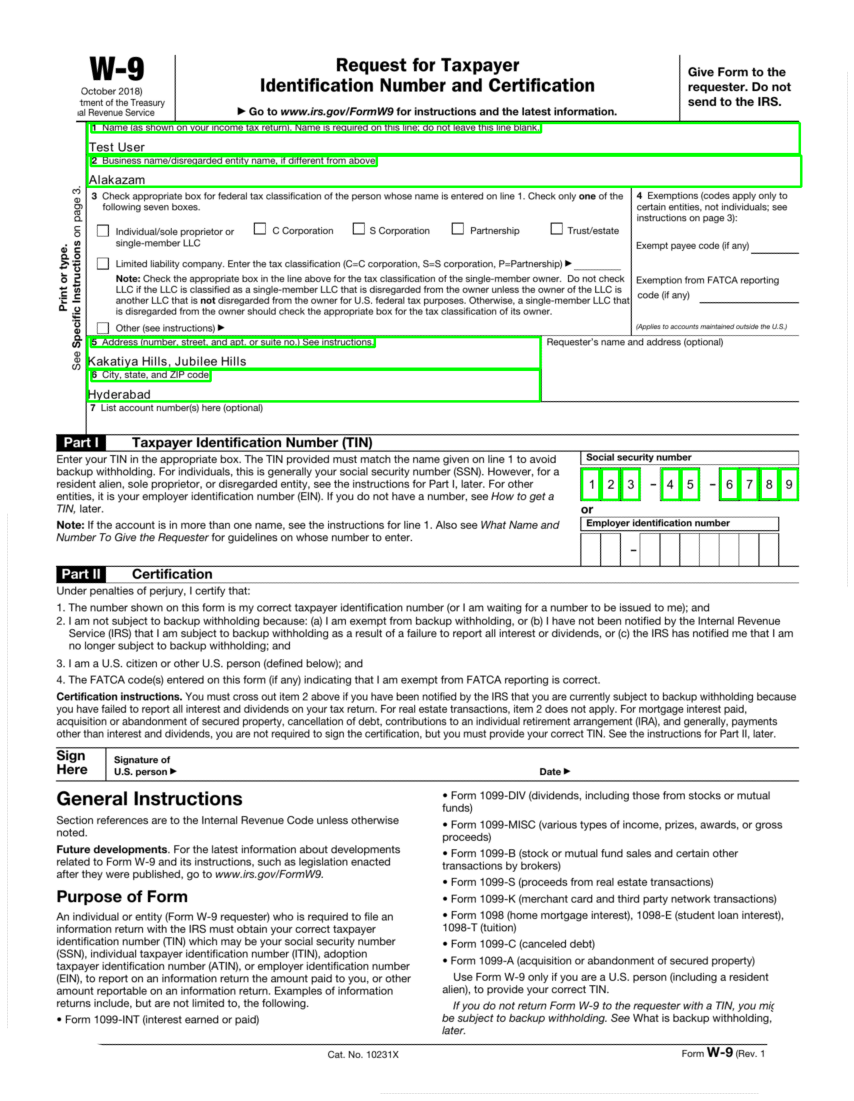

In [140]:
show(register_image, bbs=boxes)

## Remove Labels

In [141]:
from tqdm import tqdm
label_boxes = [box for box, name in zip(boxes, names) if name=='label']
field_boxes = [box for box, name in zip(boxes, names) if name!='label']
img = register_image.copy()
for label_box in tqdm(label_boxes):
    x,y,X,Y = label_box
    img[y:Y, x:X] = 255 


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<?, ?it/s]


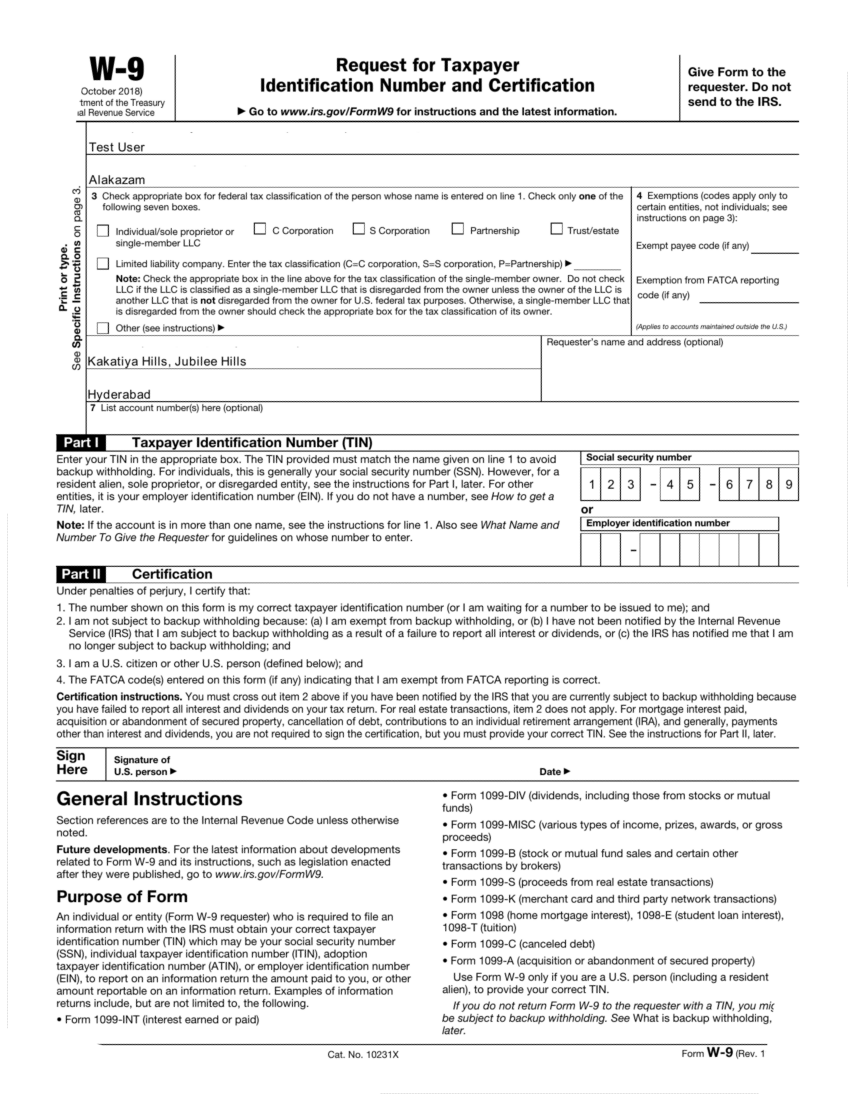

In [142]:
show(img)

## Transcribe field boxes

In [143]:
from easyocr import Reader
ocr = Reader(lang_list=['en'])

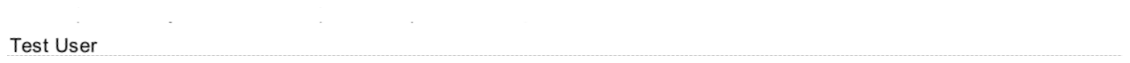

Test User `` `


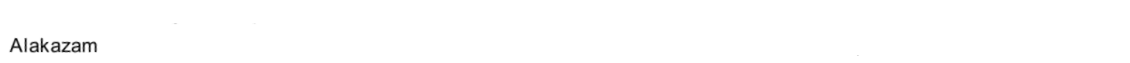

Alakazam `


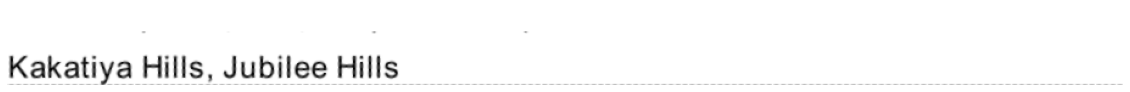

Kakatiya Hills, Jubilee Hills `


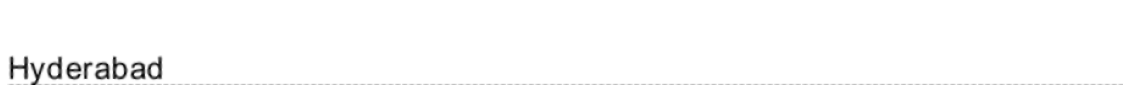

Hyderabad


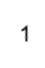

1


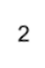

2


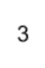

3


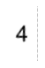

4


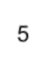

5


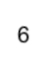

6


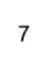

7


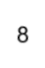

8


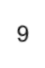

9


In [144]:
for box in field_boxes:
    crop = crop_from_bb(img, tuple(box))
    show(crop)
    print(ocr.recognize(crop)[0][1])

# Testing on PDFs


In [147]:
pdfpath = './templates/test_cases/rotated_scaled.pdf'
images = convert_from_path(pdfpath)
test_image = np.array(images[0])

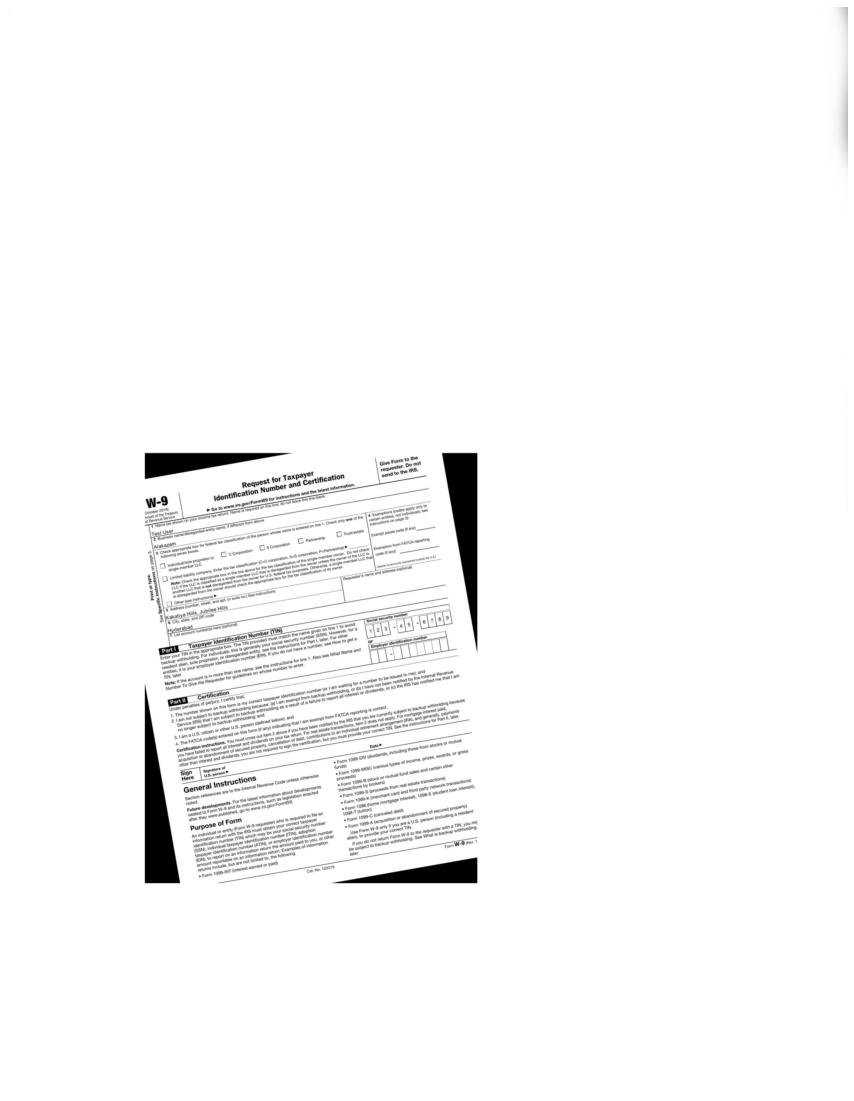

In [148]:
show(test_image)

In [149]:
register_image = register_to_template(test_image, template_img)

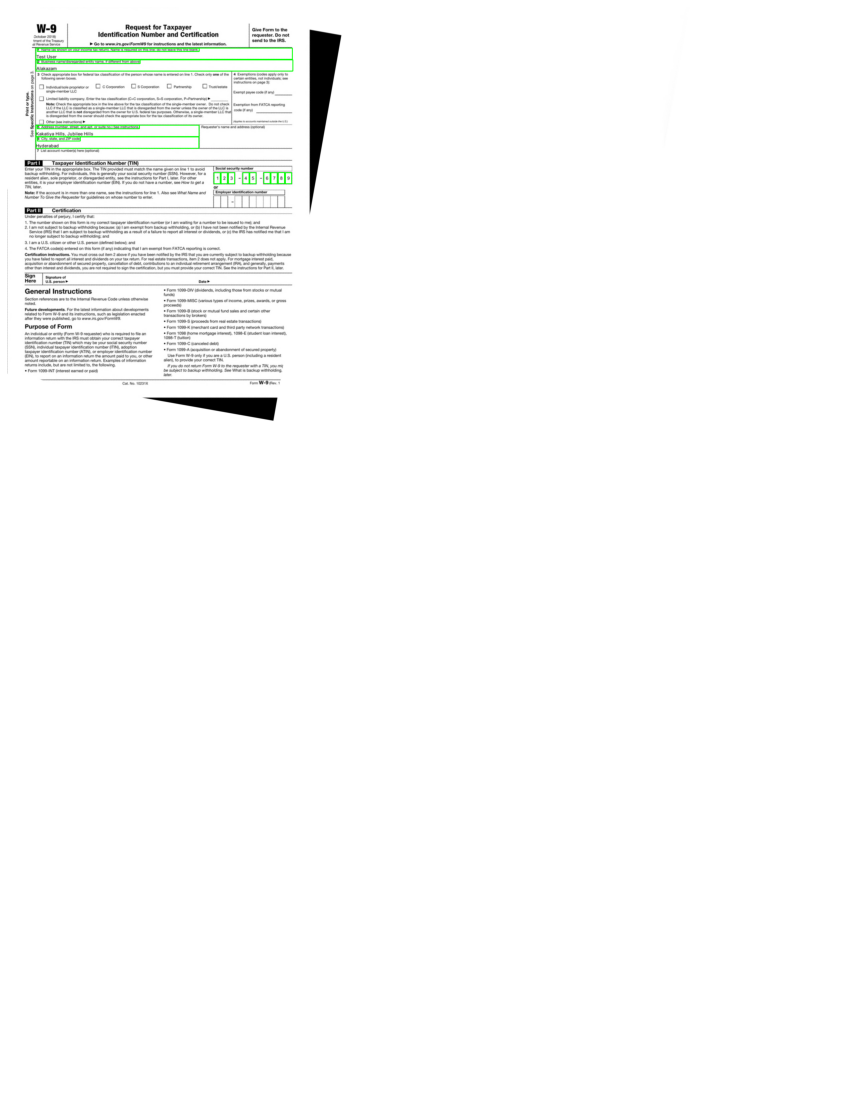

In [150]:
show(register_image, bbs=boxes)